In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json as js
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df_category = pd.read_csv('data/category.csv').drop(['Unnamed: 0'], axis=1)
df_numeric = pd.read_csv('data/numeric.csv').drop(['Unnamed: 0'], axis=1)
df_numeric_pca = pd.read_csv('data/pca.csv').drop(['Unnamed: 0'], axis=1)
df_model = pd.read_csv('data/cleaned_data.csv').drop(['Unnamed: 0'], axis=1)
df = pd.read_csv('data/category_numeric_pca.csv').drop(['Unnamed: 0'], axis=1)
df

OverTime  TrainingTimesLastYear  StockOptionLevel  \
0            1                      0                 0   
1            0                      3                 1   
2            1                      3                 0   
3            1                      3                 0   
4            0                      3                 1   
...        ...                    ...               ...   
1465         0                      3                 1   
1466         0                      5                 1   
1467         1                      0                 1   
1468         0                      3                 0   
1469         0                      3                 0   

      RelationshipSatisfaction  JobSatisfaction  JobInvolvement  \
0                            1                4               3   
1                            4                2               2   
2                            2                3               2   
3                            3                3               3   
4                            4                2               3   
...                        ...              ...             ...   
1465                         3                4               4   
1466                         1                1               2   
1467                         2                2               4   
1468                         4                2               2   
1469                         1                3               4   

      EnvironmentSatisfaction  BusinessTravel  Education  Gender  ...  \
0                           2               1          2       0  ...   
1                           3               2          1       1  ...   
2                           4               1          2       1  ...   
3                           4               2          4       0  ...   
4                           1               1          1       1  ...   
...                       ...             ...        ...     ...  ...   
1465                        3               2          2       1  ...   
1466                        4               1          1       1  ...   
1467                        2               1          3       1  ...   
1468                        4               2          3       1  ...   
1469                        2               1          3       1  ...   

      MonthlyIncome         0         1         2         3         4  \
0              5993 -0.267489  1.612452 -0.162541 -0.932900 -1.433168   
1              5130  0.856526 -0.365852 -0.165184  1.944438  1.237912   
2              2090 -2.197847  1.431922  1.408648 -2.193468 -0.517665   
3              2909 -0.568928 -0.662374 -0.709002 -0.535495 -0.043174   
4              3468 -1.567021  0.980320 -1.791146 -0.541636  0.480218   
...             ...       ...       ...       ...       ...       ...   
1465           2571 -0.737371  0.538532  0.613465  0.960740  0.988985   
1466           9991  0.725391  0.140641 -1.233597  0.499639  0.819495   
1467           6142 -1.329547 -0.851402  0.351346 -0.249037 -0.111438   
1468           5390  1.102146  0.311703 -0.148646 -0.924588  0.154829   
1469           4404 -1.242330 -0.228616 -0.198524 -0.535312 -1.173019   

             5         6         7         8  
0     1.012589  0.830271  1.498483 -0.906336  
1    -0.673868  1.723922 -0.309550 -0.906684  
2    -0.216832  0.203104  0.684813  0.239880  
3     2.349378  0.139465 -0.014291  0.450256  
4     0.104882 -0.434996  2.329865 -0.003300  
...        ...       ...       ...       ...  
1465 -0.180241 -1.654153  0.231400 -0.412426  
1466  0.391727  0.091686  0.394314 -0.913625  
1467 -2.309217  1.197643 -0.576452 -0.131962  
1468  0.364875  0.242491 -0.503699 -1.173900  
1469 -0.447617 -0.102558 -0.173323  0.092322  

[1470 rows x 55 columns]

Numerical Data Visualisation


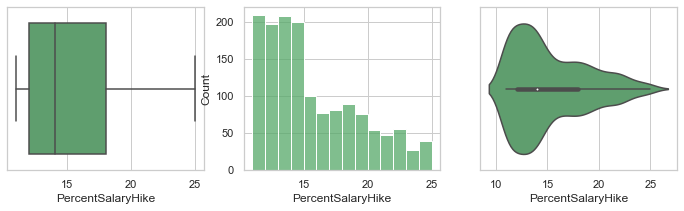

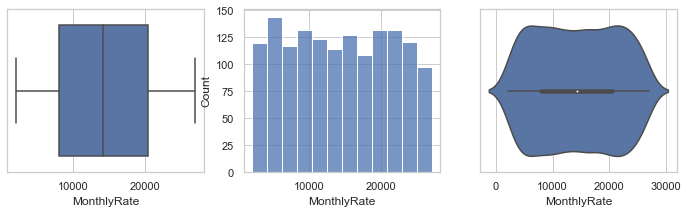

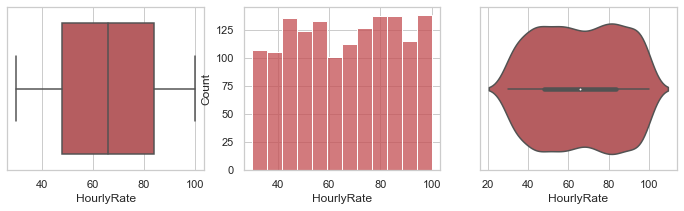

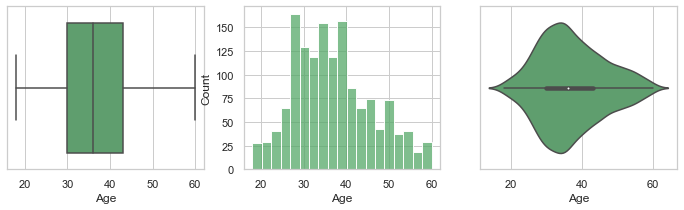

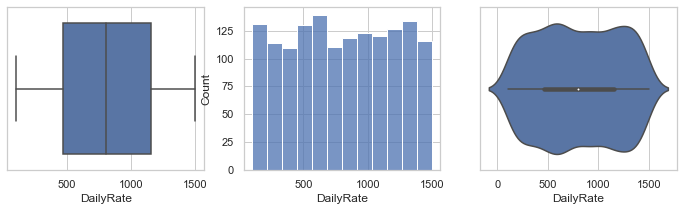

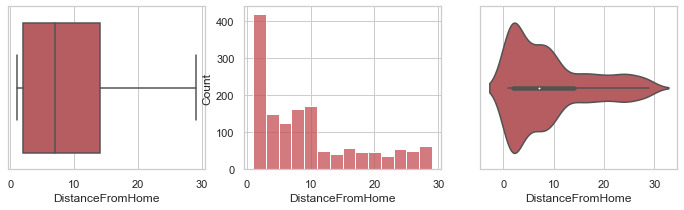

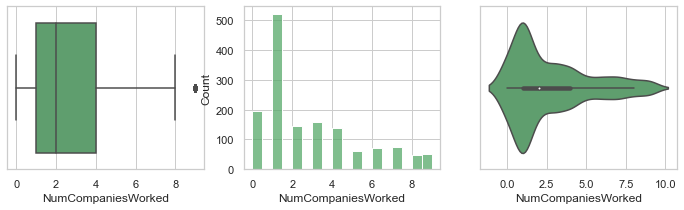

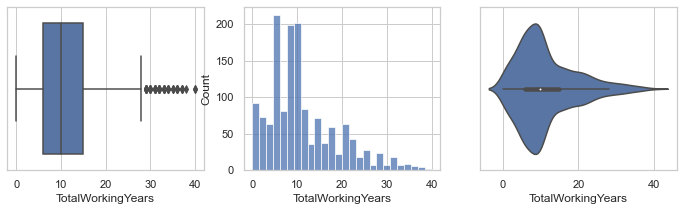

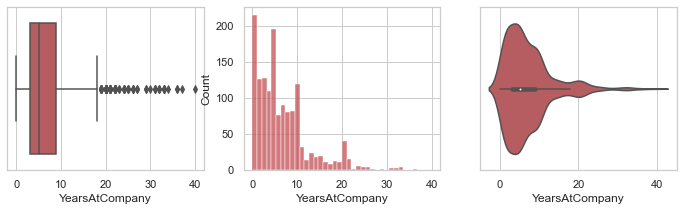

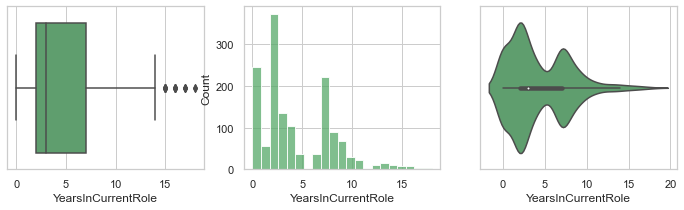

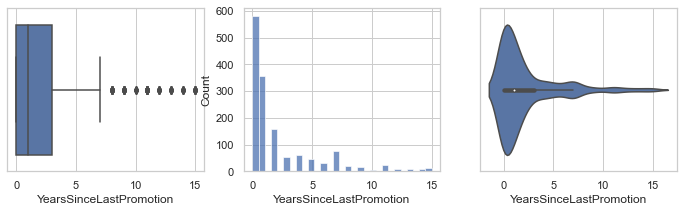

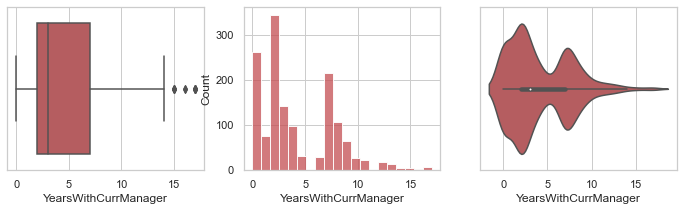

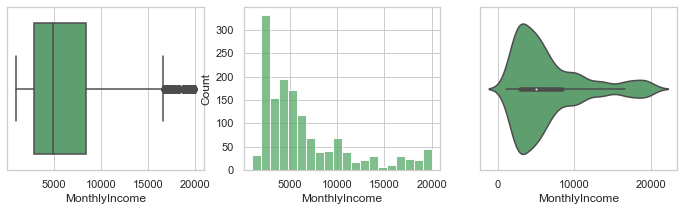

In [174]:
print('Numerical Data Visualisation')
color = ['g', 'b', 'r']
for i, name in enumerate(df_numeric):
    f, ax = plt.subplots(1, 3, figsize=(12, 3))
    sns.boxplot(x=df[name], orient = 'h', ax = ax[0], color=color[i%3])
    sns.histplot(x=df[name], kde = False, ax = ax[1], color=color[i%3])
    sns.violinplot(x=df[name], ax=ax[2], color=color[i%3])

PCA Data Visualisation


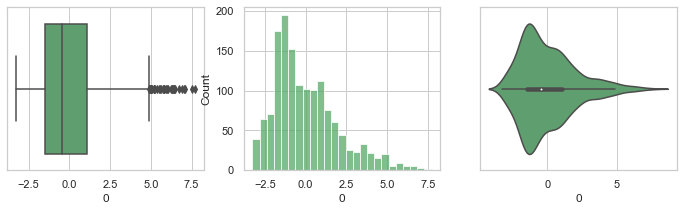

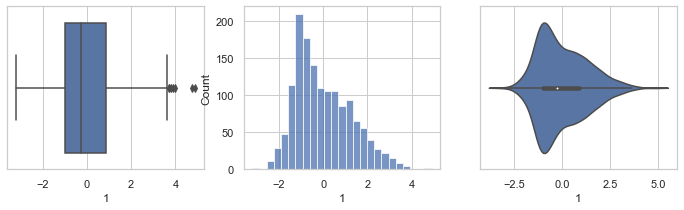

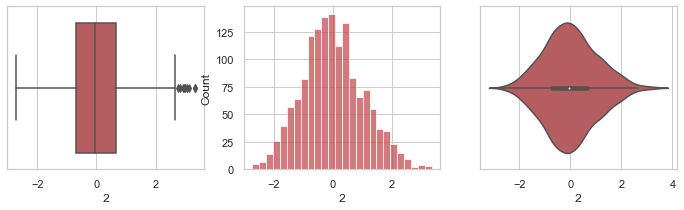

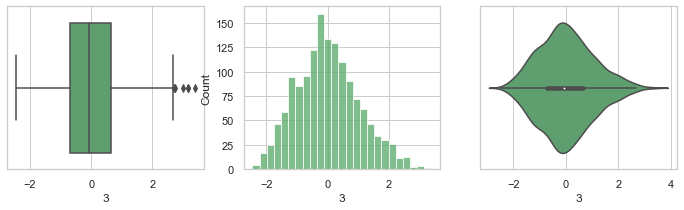

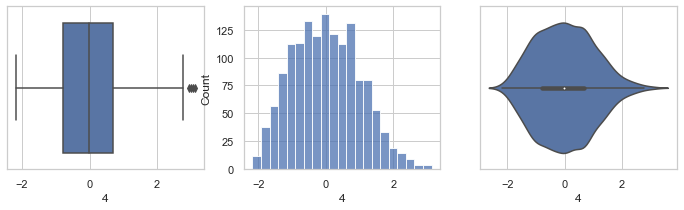

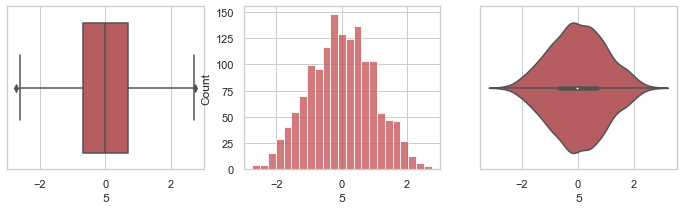

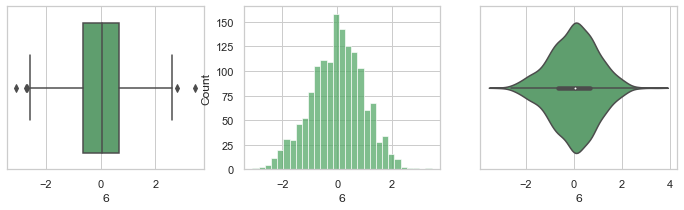

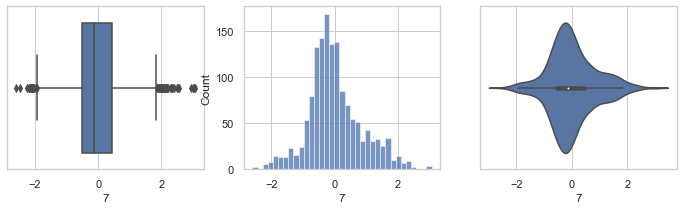

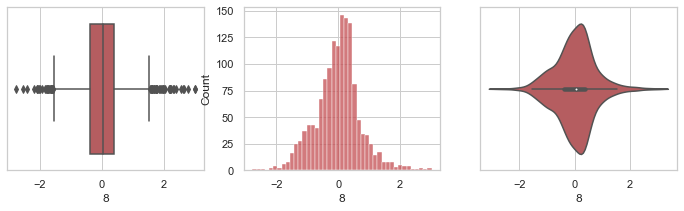

In [177]:
print('PCA Data Visualisation')
color = ['g', 'b', 'r']
for i, name in enumerate(df_numeric_pca):
    f, ax = plt.subplots(1, 3, figsize=(12, 3))
    sns.boxplot(x=df[name], orient = 'h', ax = ax[0], color=color[i%3])
    sns.histplot(x=df[name], kde = False, ax = ax[1], color=color[i%3])
    sns.violinplot(x=df[name], ax=ax[2], color=color[i%3])

Category Variable Visualization


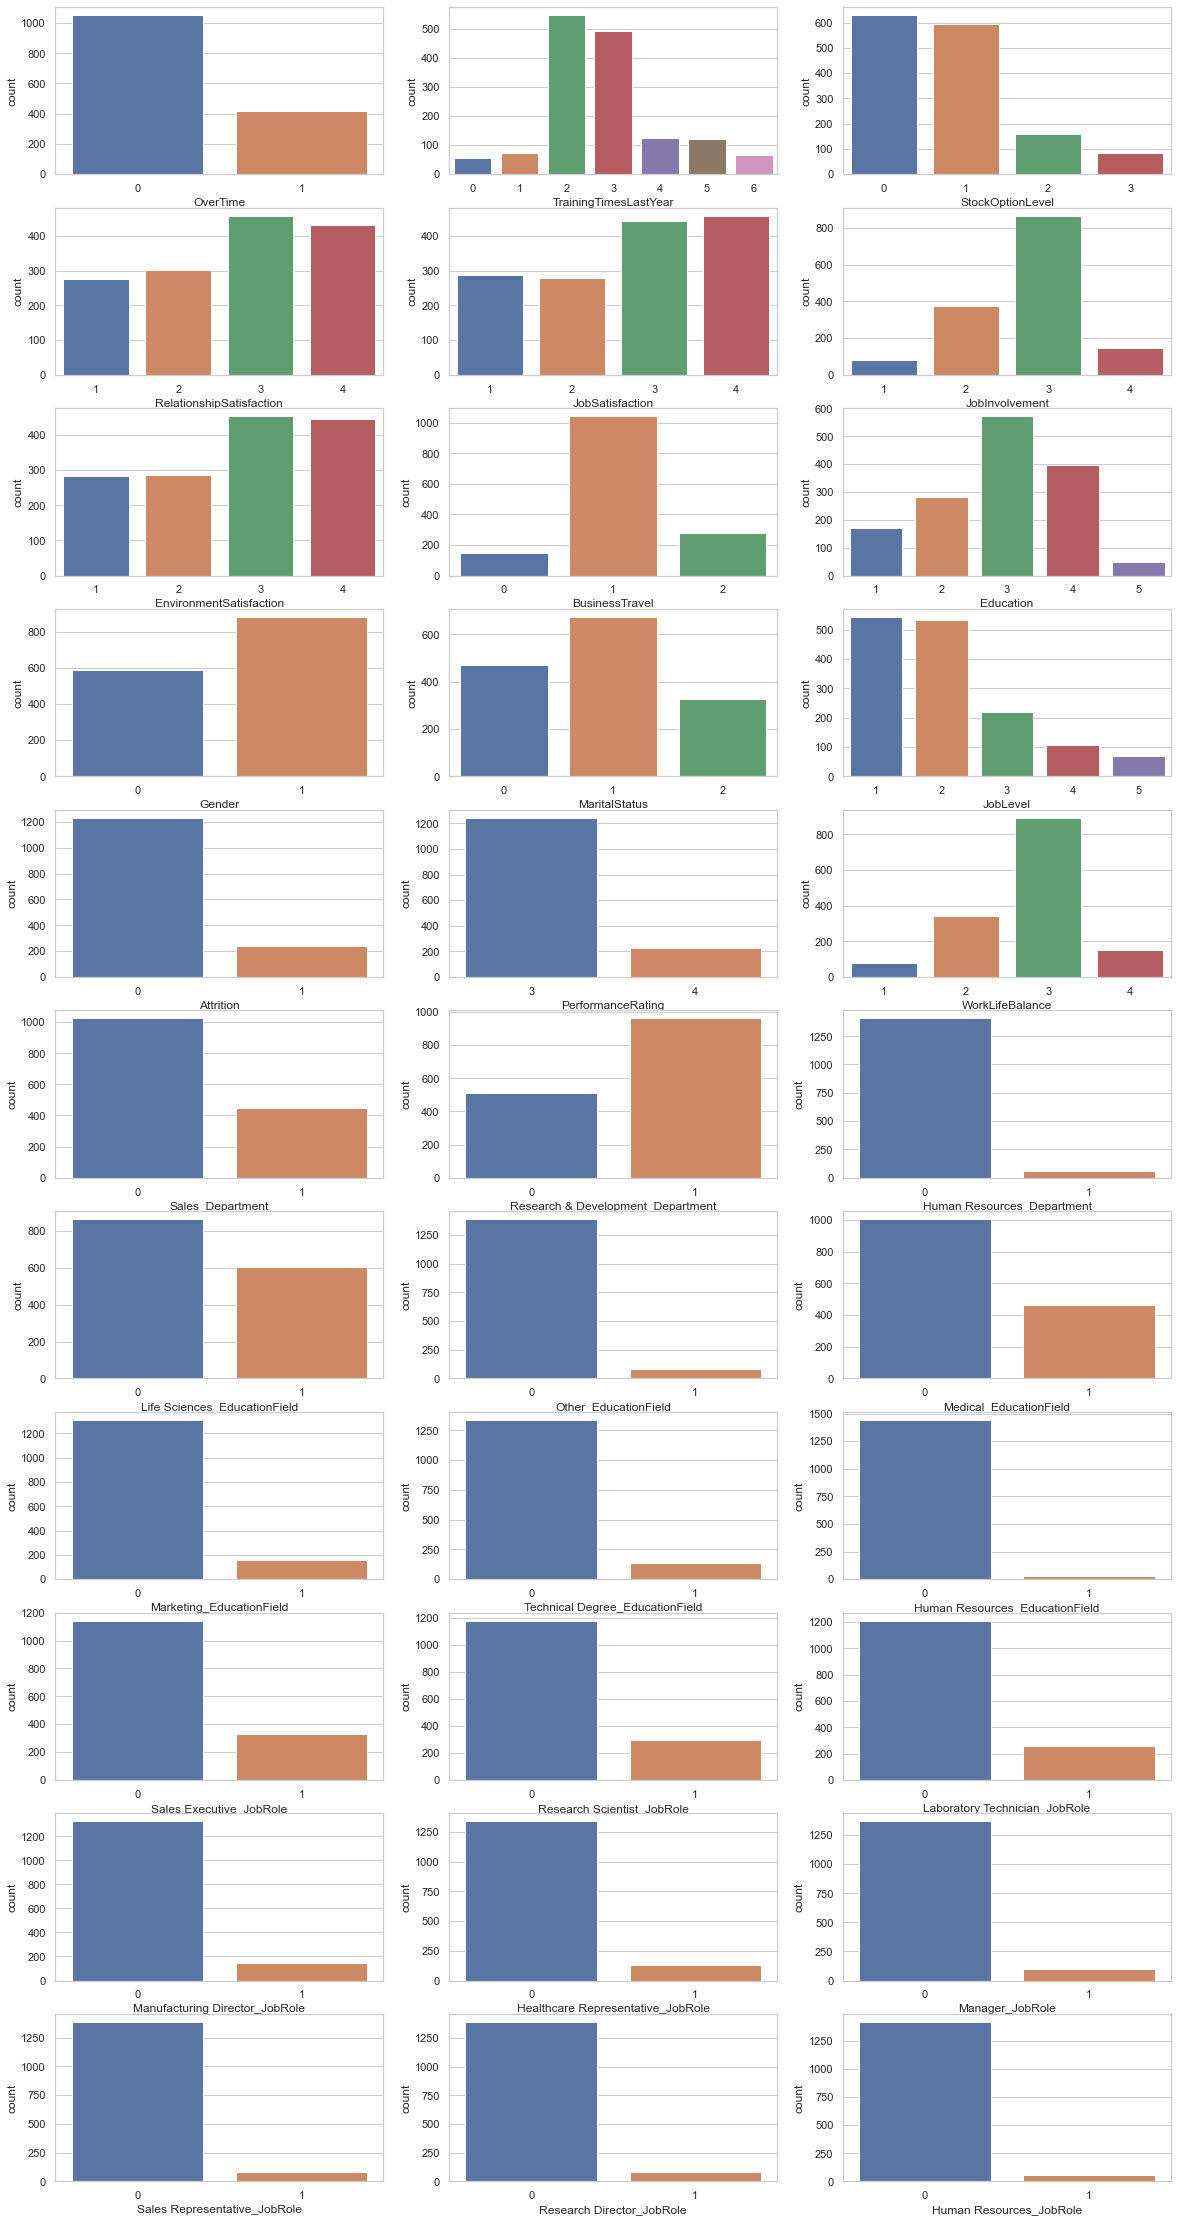

In [76]:
print('Category Variable Visualization')
f, ax = plt.subplots(11, 3, figsize=(20, 40))
# 00 01, 10 11, 20 21, 30 31
for i, name in enumerate(df_category):
    a, b = i//3, i%3
    sns.countplot(x=df_category[name], ax = ax[a, b])

# Attrition

Numerical variables VS Attrition


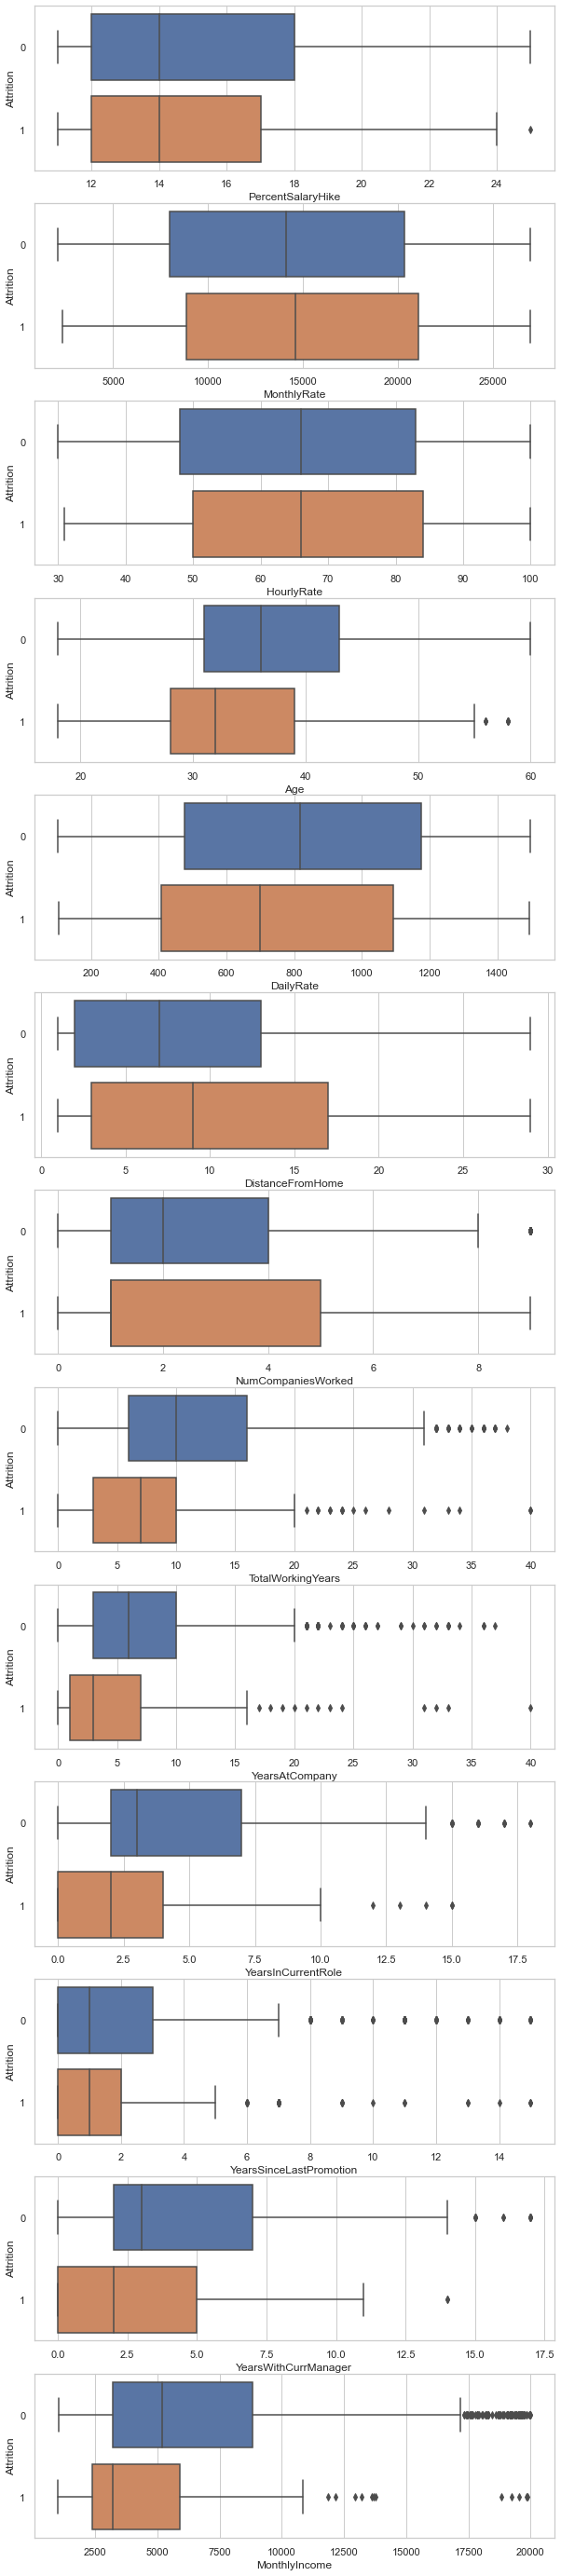

In [178]:
print('Numerical variables VS Attrition')
f, ax = plt.subplots(13, 1, figsize=(10, 50))
for i, name in enumerate(df_numeric):
    sns.boxplot(x=name, y='Attrition', data=df, orient='h', ax=ax[i])

Principal Component Numerical variables VS Attrition


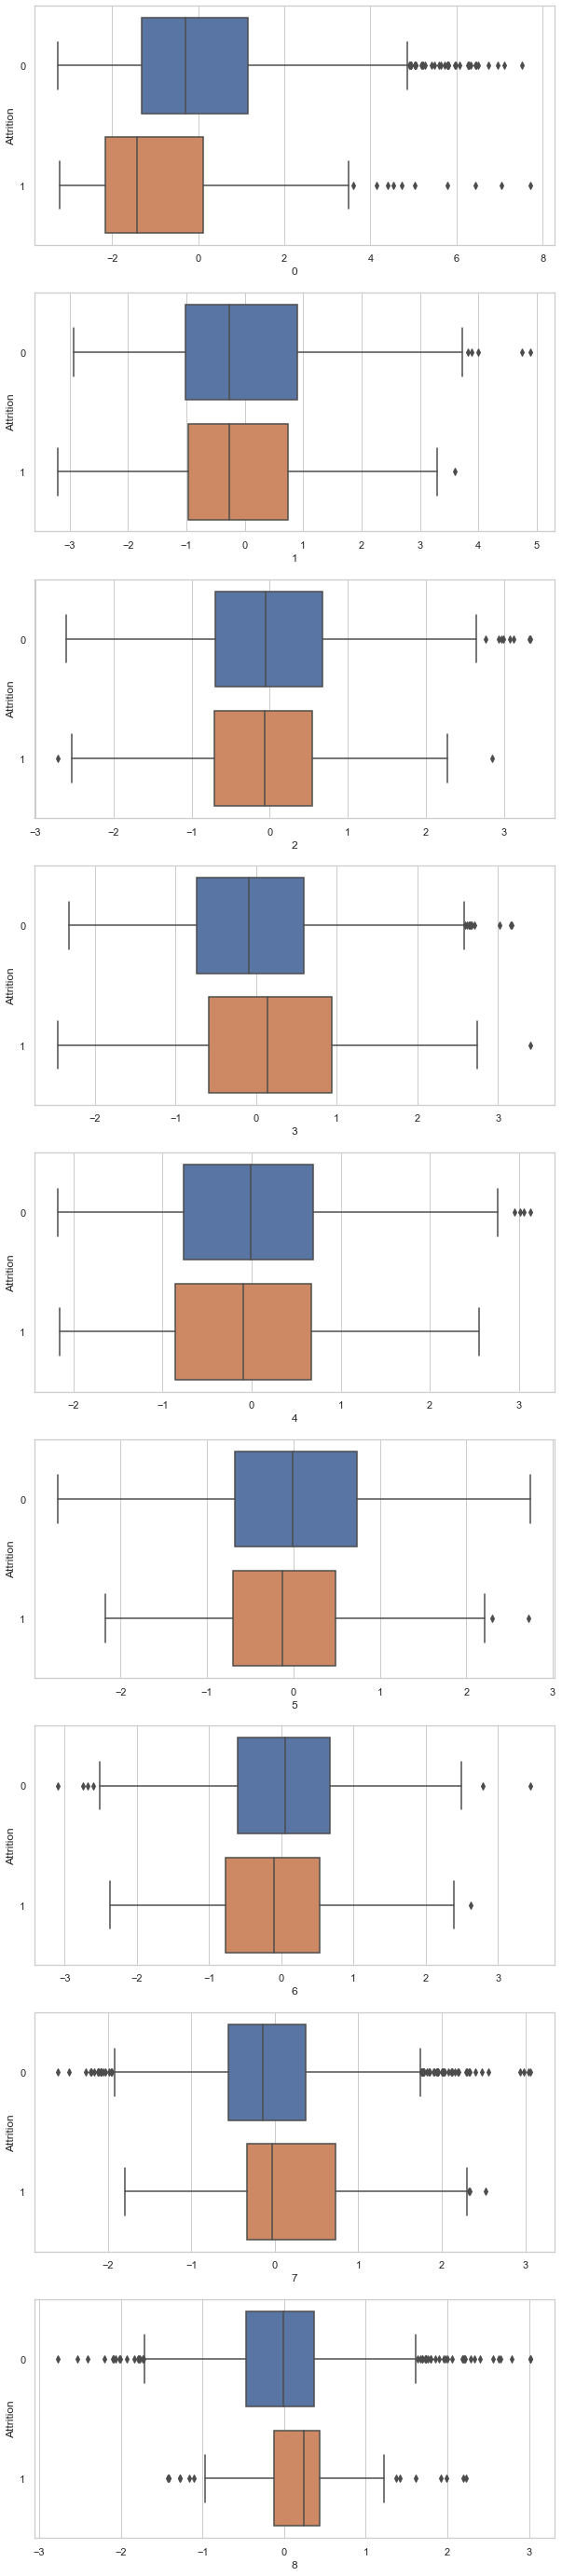

In [179]:
print('Principal Component Numerical variables VS Attrition')
f, ax = plt.subplots(9, 1, figsize=(10, 50))
for i, name in enumerate(df_numeric_pca):
    sns.boxplot(x=name, y='Attrition', data=df, orient='h', ax=ax[i])

Category Variable VS Attrition ！！！Bar color


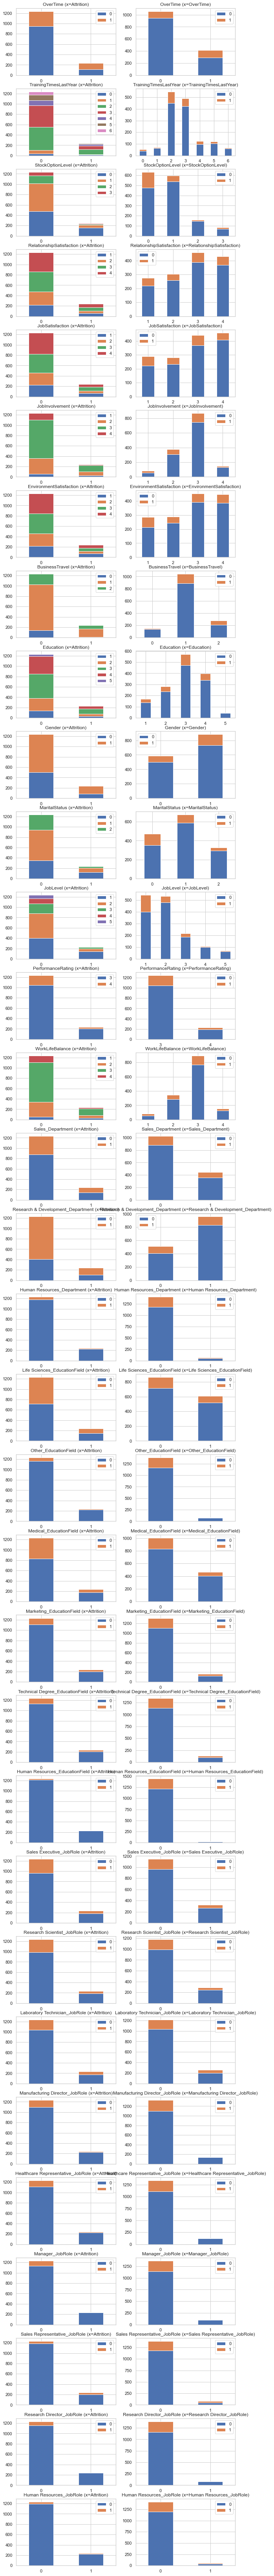

In [180]:
print('Category Variable VS Attrition')
fig, ax = plt.subplots(32, 2, figsize=(10, 120))
for i, name in enumerate(df_category.drop(['Attrition'], axis=1)):
    df_test = df[[name, 'Attrition', 'Age']].groupby([name, 'Attrition']).count()
    name_id = df_test.index.get_level_values(name).unique()
    dic = {j:list((df_test.loc[j])['Age']) for j in name_id}
    df_plot = pd.DataFrame(dic)
    df_plotT = df_plot.T
    pt0 = df_plot.reset_index().plot(
        x = 'index',
        rot = 0,
        kind = 'bar',
        stacked = True,
        title = name+' (x=Attrition)',
        ax=ax[i, 0],
        legend = True,
    )
    pt1 = df_plotT.reset_index().plot(
        x = 'index',
        rot = 0,
        kind = 'bar',
        stacked = True,
        title = name+' (x='+name+')',
        ax=ax[i, 1],
        legend = True
    )
    ax[i, 0].set(xlabel=None)
    ax[i, 1].set(xlabel=None)

<AxesSubplot:>

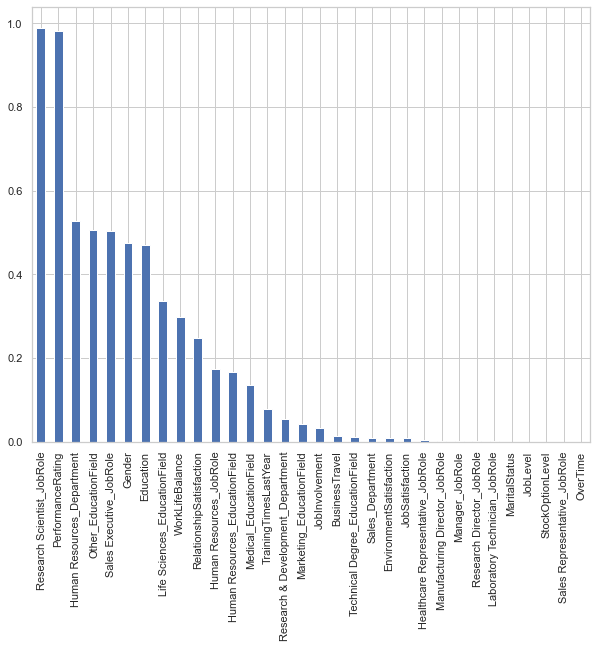

In [181]:
X = df_category.drop(['Attrition'],axis=1)
y = df_category['Attrition']
y = y.astype('int')
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending=False , inplace=True)
p_values.plot.bar()

Age, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, OverTime, StockOptionLevel, Years

Research Scientist_JobRole           0.000360
PerformanceRating                    0.002889
1                                    0.011615
2                                    0.016694
Human Resources_Department           0.016832
Other_EducationField                 0.017898
Sales Executive_JobRole              0.019774
4                                    0.028870
Gender                               0.029453
Education                            0.030346
Life Sciences_EducationField         0.032703
5                                    0.036193
Human Resources_JobRole              0.036215
Human Resources_EducationField       0.036466
RelationshipSatisfaction             0.042664
Medical_EducationField               0.046999
TrainingTimesLastYear                0.051757
WorkLifeBalance                      0.051951
6                                    0.054206
Marketing_EducationField    

<AxesSubplot:>

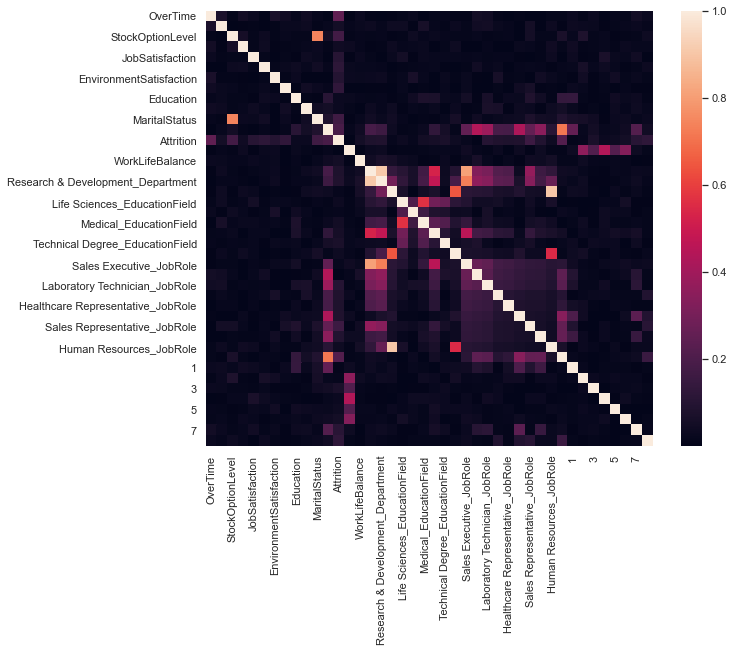

In [182]:
print('Age, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, OverTime, StockOptionLevel, Years\n')
corr = df_model.corr(method="spearman")
print(abs(corr['Attrition']).sort_values())
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(abs(corr))

# Performance Rating

Numerical variables VS PerformanceRating


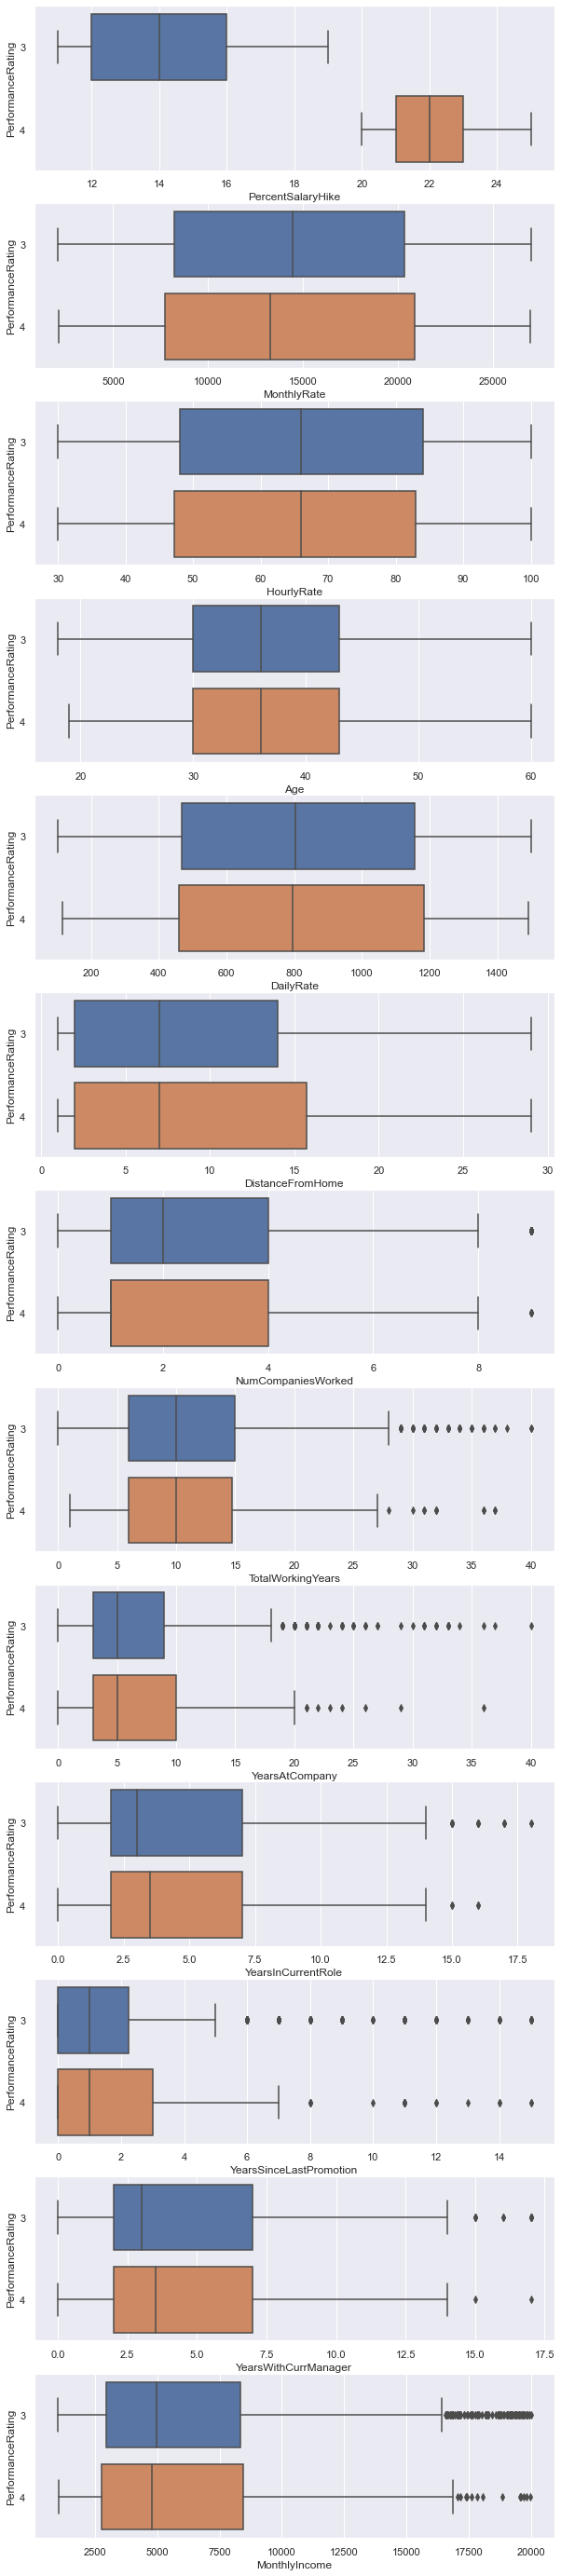

In [183]:
print('Numerical variables VS PerformanceRating')
f, ax = plt.subplots(13, 1, figsize=(10, 50))
for i, name in enumerate(df_numeric):
    sns.boxplot(x=name, y='PerformanceRating', data=df, orient='h', ax=ax[i])

Principal Component Numerical variables VS Attrition


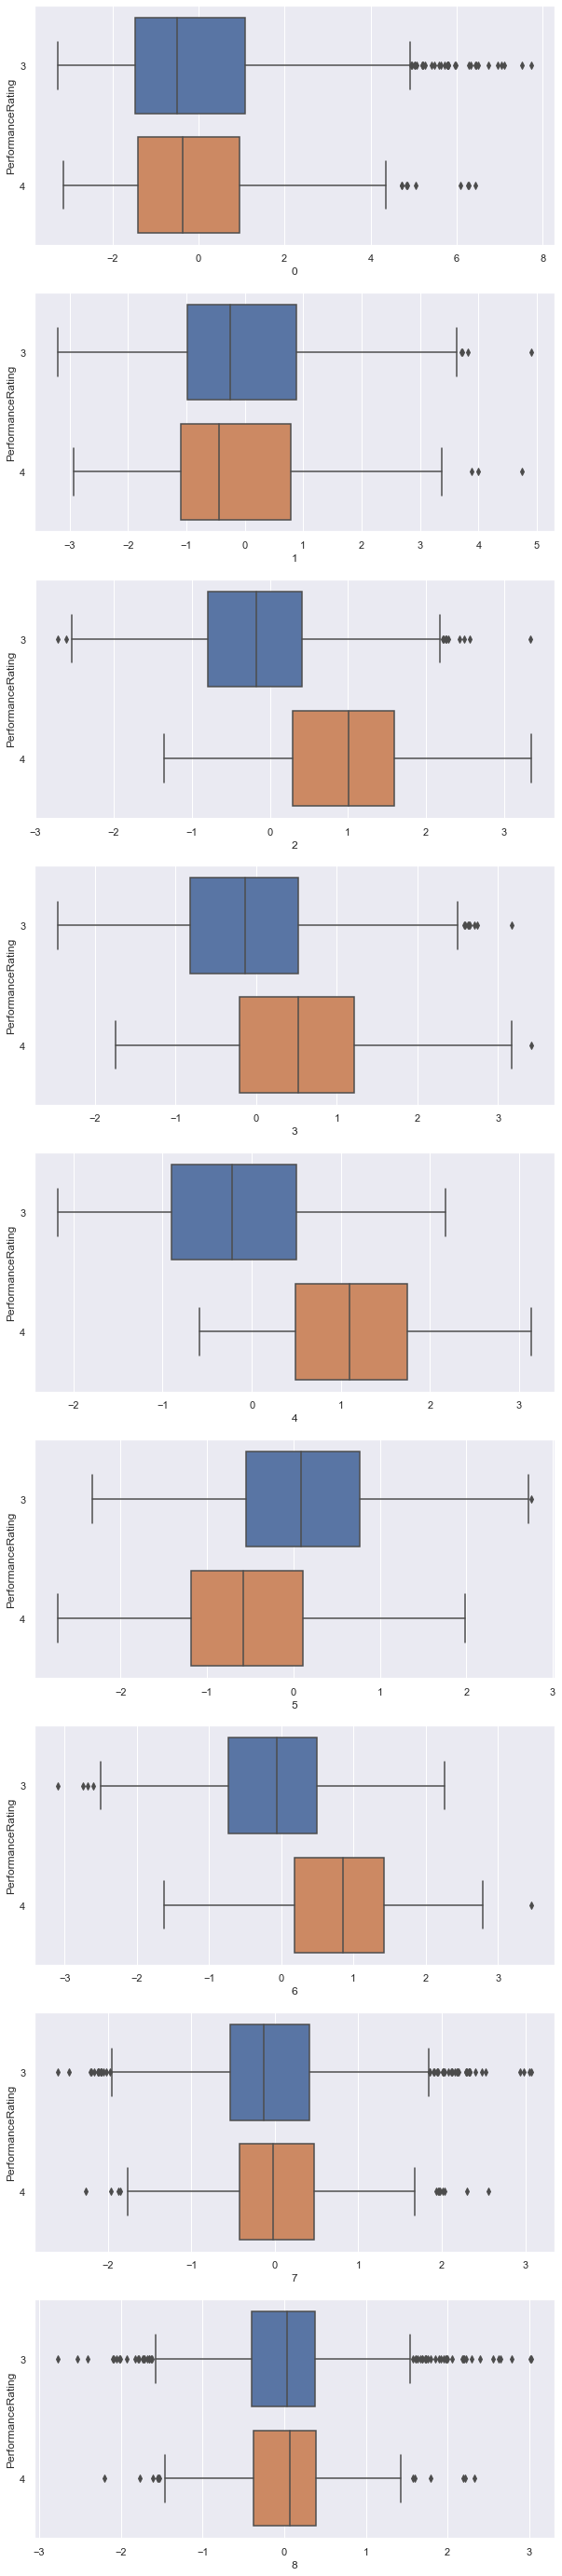

In [184]:
print('Principal Component Numerical variables VS Attrition')
f, ax = plt.subplots(9, 1, figsize=(10, 50))
for i, name in enumerate(df_numeric_pca):
    sns.boxplot(x=name, y='PerformanceRating', data=df, orient='h', ax=ax[i])

Category Variable VS PerformanceRating


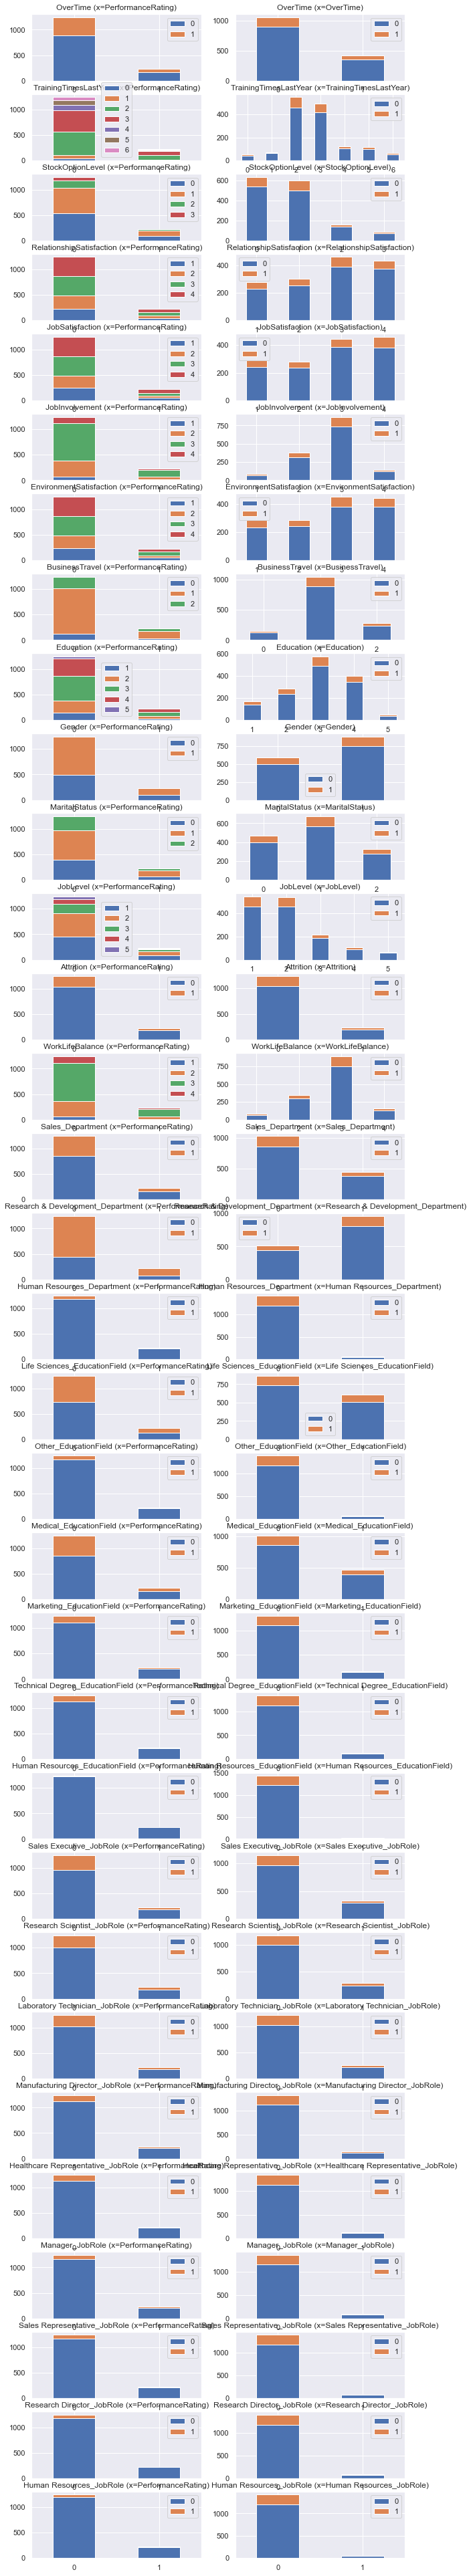

In [185]:
print('Category Variable VS PerformanceRating')
fig, ax = plt.subplots(32, 2, figsize=(10, 70))
for i, name in enumerate(df_category.drop(['PerformanceRating'], axis=1)):
    df_test = df[[name, 'PerformanceRating', 'Age']].groupby([name, 'PerformanceRating']).count()
    name_id = df_test.index.get_level_values(name).unique()
    dic = {j:list((df_test.loc[j])['Age']) for j in name_id}
    df_plot = pd.DataFrame(dic)
    df_plotT = df_plot.T
    pt0 = df_plot.reset_index().plot(
        x = 'index',
        rot = 0,
        kind = 'bar',
        stacked = True,
        title = name+' (x=PerformanceRating)',
        ax=ax[i, 0],
        legend = True,
    )
    pt1 = df_plotT.reset_index().plot(
        x = 'index',
        rot = 0,
        kind = 'bar',
        stacked = True,
        title = name+' (x='+name+')',
        ax=ax[i, 1],
        legend = True,
    )
    ax[i, 0].set(xlabel=None)
    ax[i, 1].set(xlabel=None)

<AxesSubplot:>

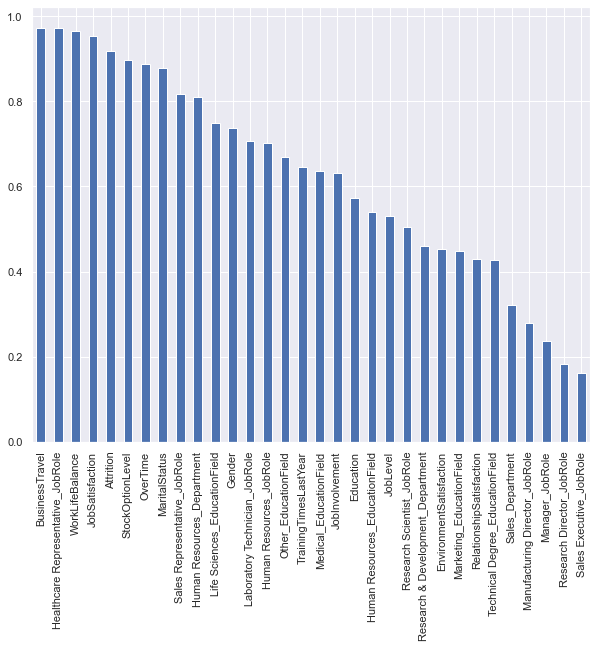

In [186]:
X = df_category.drop('PerformanceRating',axis=1)
y = df_category['PerformanceRating']
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending=False , inplace=True)
p_values.plot.bar()

PercentSalaryHike

 Age                                  0.000093
DailyRate                            0.000624
Healthcare Representative_JobRole    0.000928
HourlyRate                           0.002185
BusinessTravel                       0.002789
Attrition                            0.002889
OverTime                             0.004369
MaritalStatus                        0.004739
Sales Representative_JobRole         0.006214
Human Resources_Department           0.006385
YearsSinceLastPromotion              0.006578
WorkLifeBalance                      0.006808
JobSatisfaction                      0.006979
NumCompaniesWorked                   0.008298
0                                    0.009178
MonthlyRate                          0.009698
Human Resources_JobRole              0.010154
Laboratory Technician_JobRole        0.010796
Life Sciences_EducationField         0.010853
StockOptionLevel                     0.011028
DistanceFromHome                     0.011320
Other_Educatio

<AxesSubplot:>

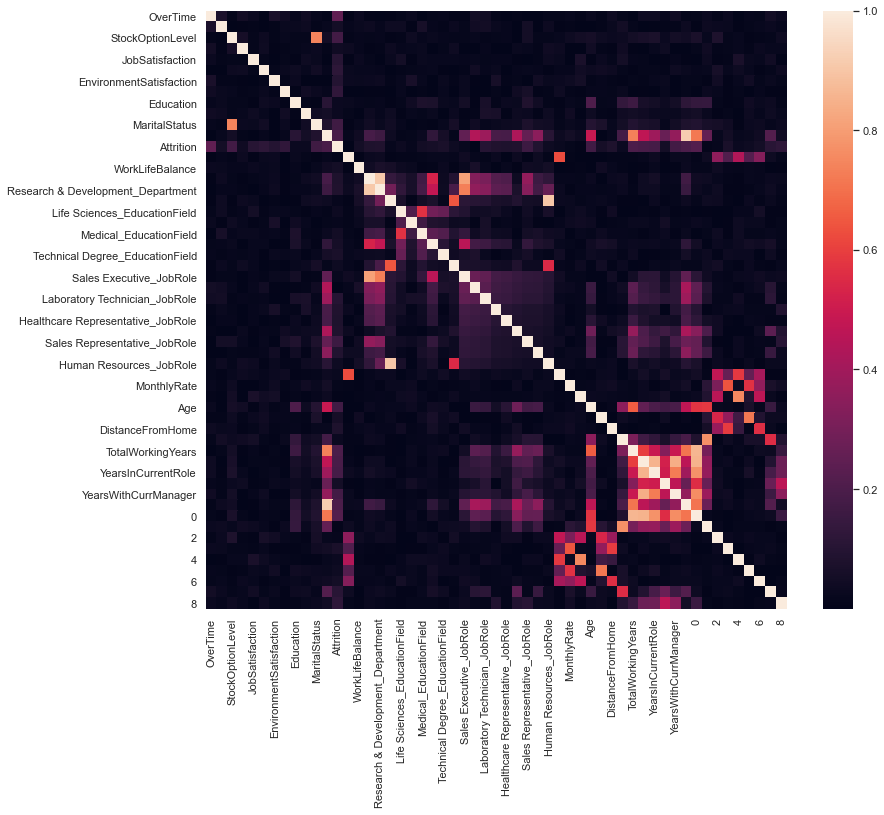

In [187]:
print('PercentSalaryHike')
corr = df.corr(method="spearman")
print('\n', abs(corr['PerformanceRating']).sort_values())
sns.set(rc={'figure.figsize':(13,11)})
sns.heatmap(abs(corr))

# WorkLifeBalance

Numerical variables VS WorkLifeBalance


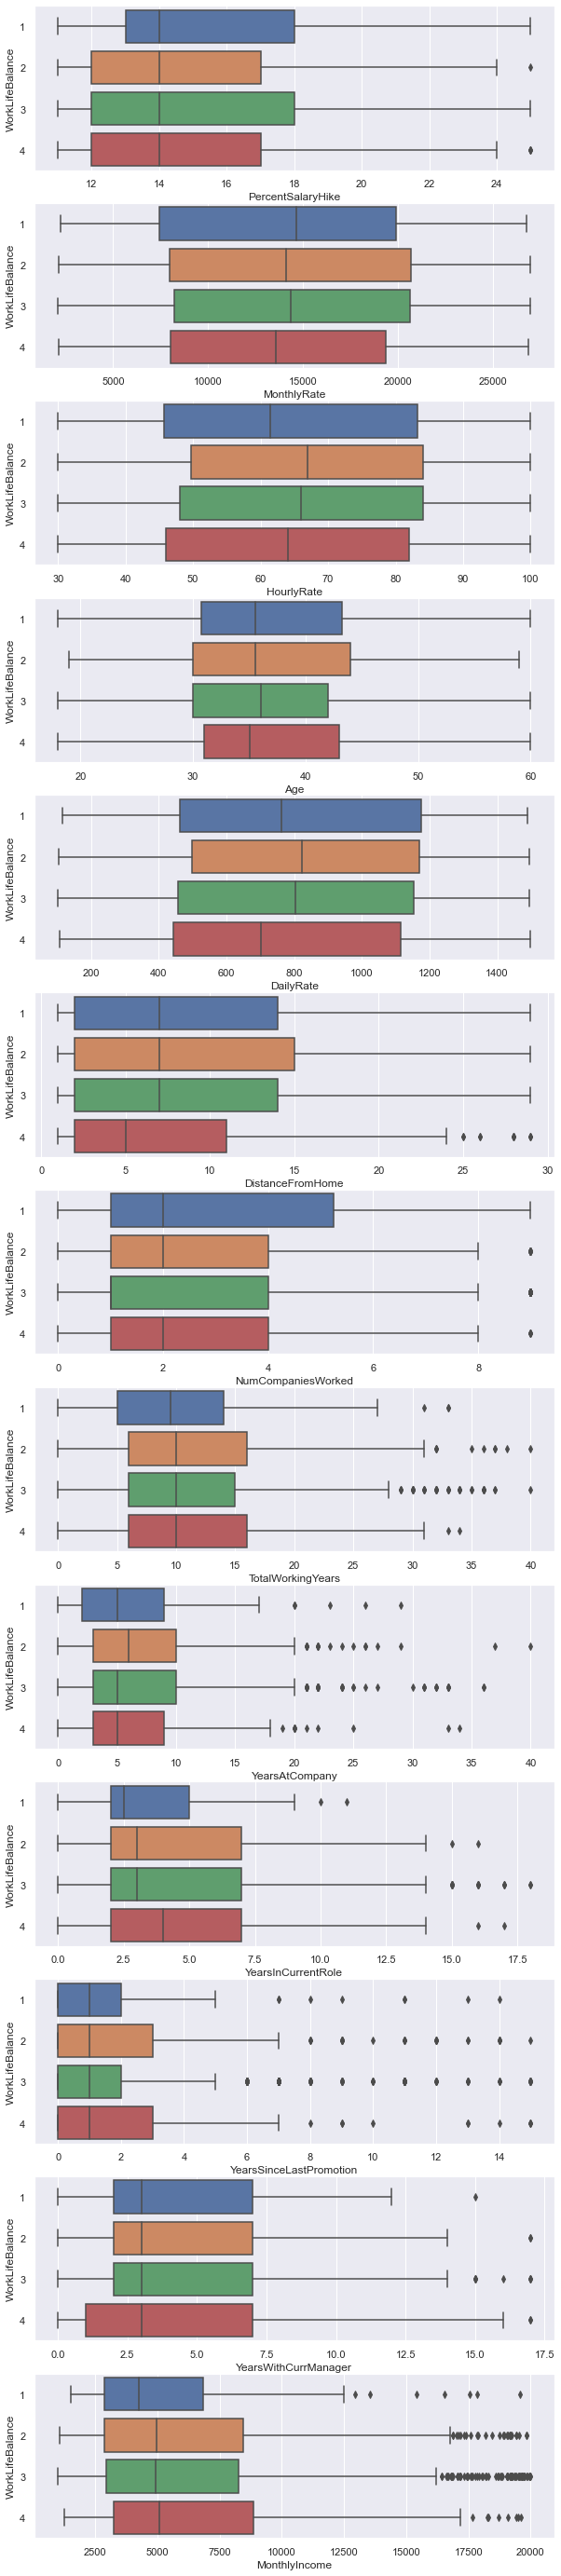

In [188]:
print('Numerical variables VS WorkLifeBalance')
f, ax = plt.subplots(13, 1, figsize=(10, 50))
for i, name in enumerate(df_numeric):
    sns.boxplot(x=name, y='WorkLifeBalance', data=df, orient='h', ax=ax[i])

Principal Component Numerical variables VS Attrition


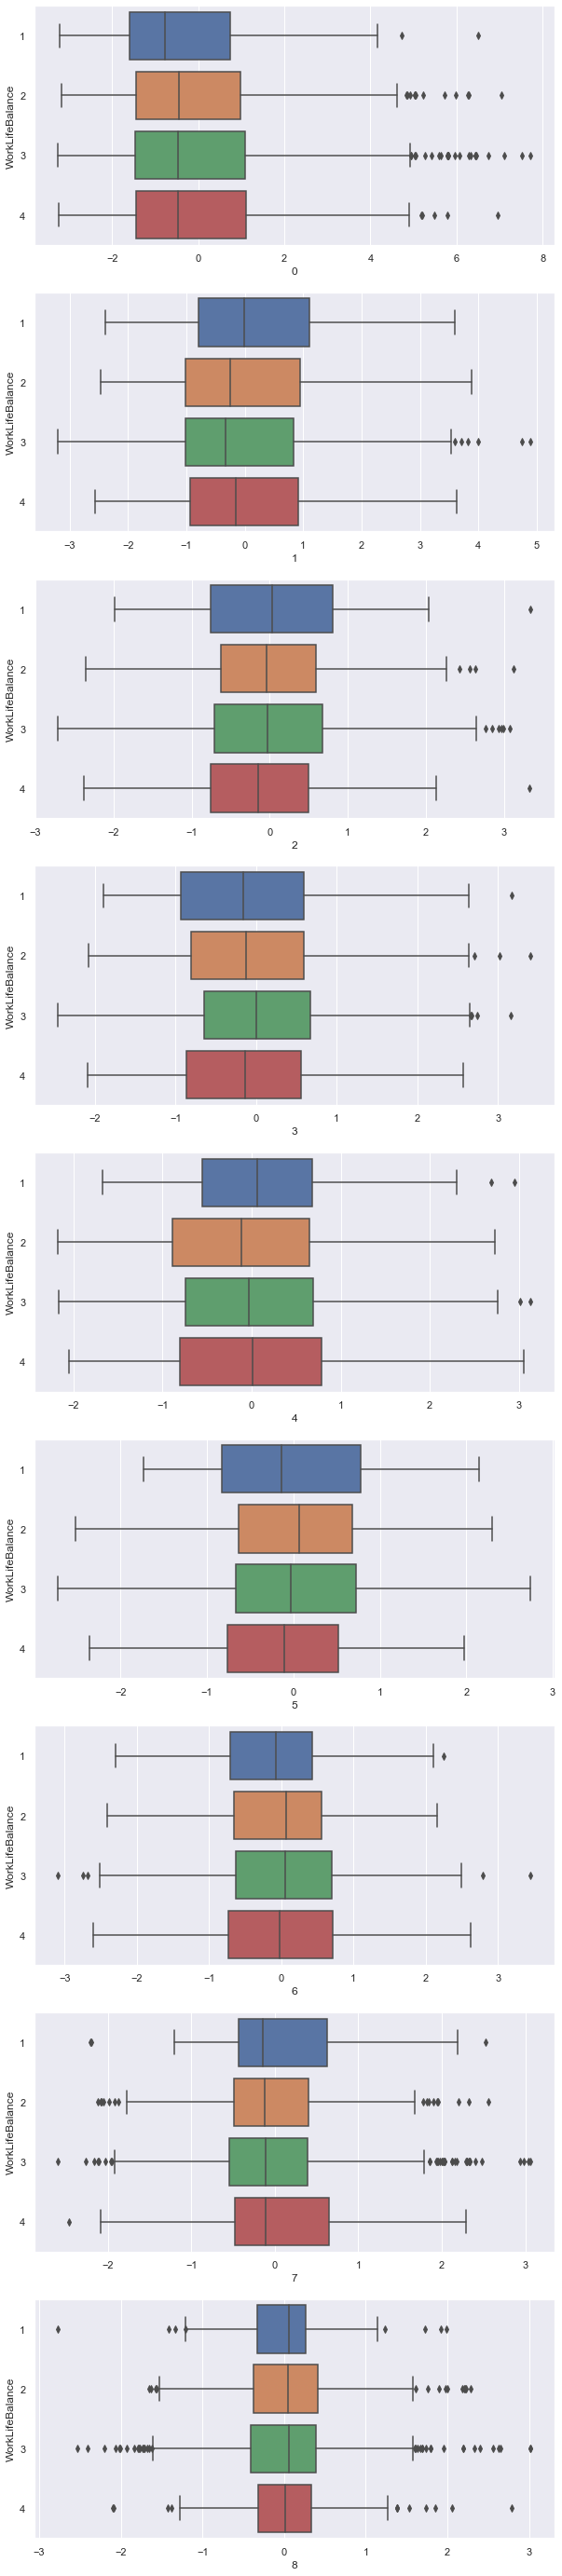

In [189]:
print('Principal Component Numerical variables VS Attrition')
f, ax = plt.subplots(9, 1, figsize=(10, 50))
for i, name in enumerate(df_numeric_pca):
    sns.boxplot(x=name, y='WorkLifeBalance', data=df, orient='h', ax=ax[i])

Category Variable VS WorkLifeBalance


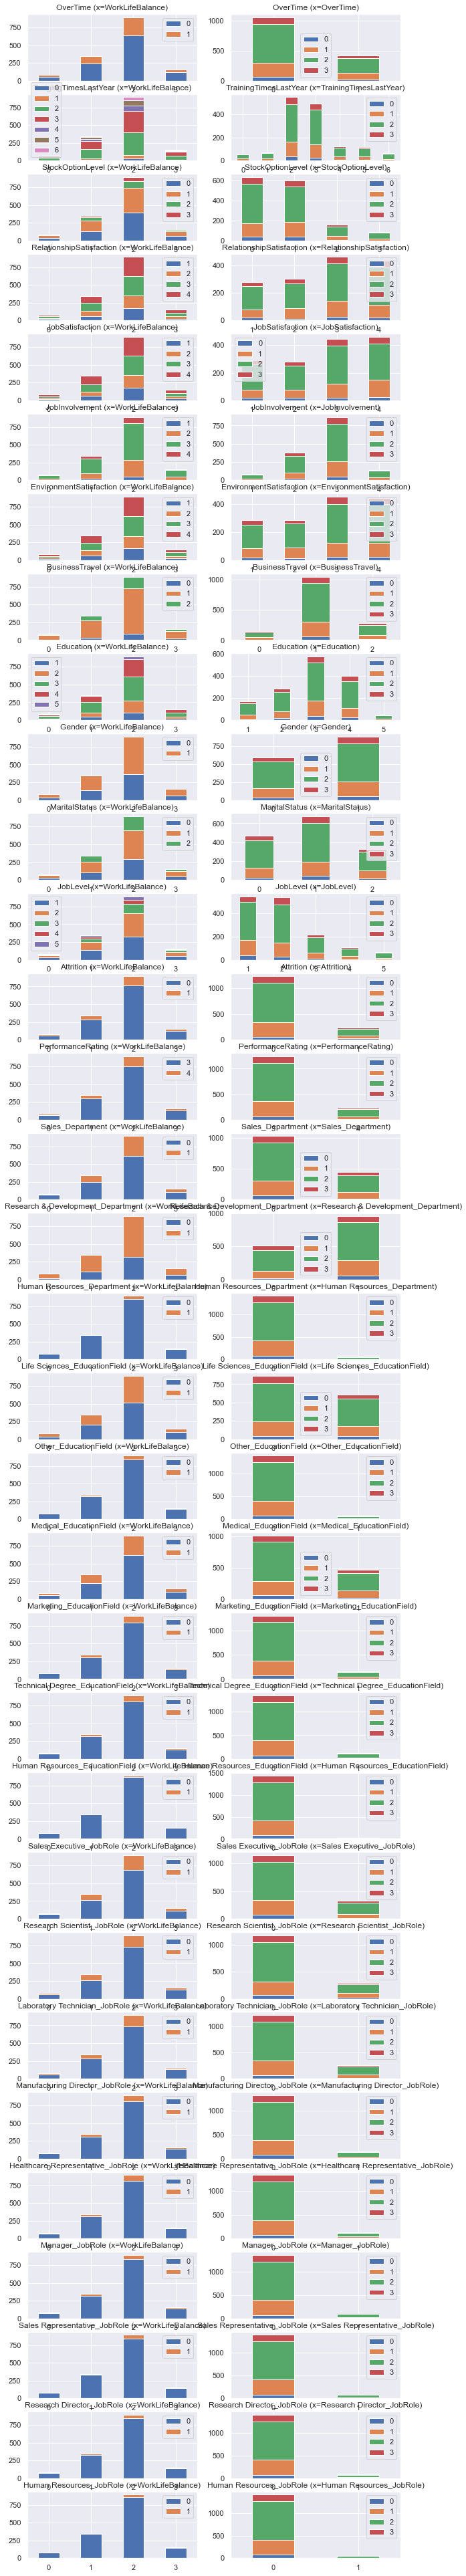

In [190]:
print('Category Variable VS WorkLifeBalance')
fig, ax = plt.subplots(32, 2, figsize=(10, 70))
for i, name in enumerate(df_category.drop(['WorkLifeBalance'], axis=1)):
    df_test = df[[name, 'WorkLifeBalance', 'Age']].groupby([name, 'WorkLifeBalance']).count()
    name_id = df_test.index.get_level_values(name).unique()
    dic = {j:list((df_test.loc[j])['Age']) for j in name_id}
    if name == 'StockOptionLevel':
        dic[3] = [0]+dic[3]
    df_plot = pd.DataFrame(dic)
    df_plotT = df_plot.T
    pt0 = df_plot.reset_index().plot(
        x = 'index',
        rot = 0,
        kind = 'bar',
        stacked = True,
        title = name+' (x=WorkLifeBalance)',
        ax=ax[i, 0],
        legend = True,
    )
    pt1 = df_plotT.reset_index().plot(
        x = 'index',
        rot = 0,
        kind = 'bar',
        stacked = True,
        title = name+' (x='+name+')',
        ax=ax[i, 1],
        legend = True
    )
    ax[i, 0].set(xlabel=None)
    ax[i, 1].set(xlabel=None)

<AxesSubplot:>

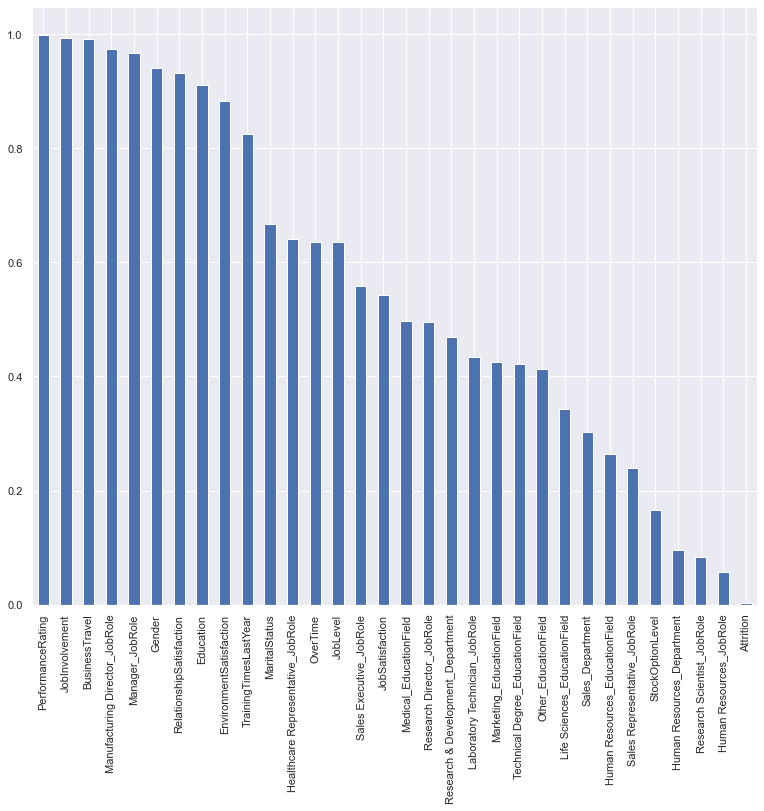

In [191]:
X = df_category.drop('WorkLifeBalance',axis=1)
y = df_category['WorkLifeBalance']
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending=False , inplace=True)
p_values.plot.bar()

Low Correlation: All

 Manufacturing Director_JobRole       0.000782
PercentSalaryHike                    0.000930
Gender                               0.001702
YearsSinceLastPromotion              0.002151
TotalWorkingYears                    0.003004
BusinessTravel                       0.003381
Age                                  0.003707
7                                    0.003783
YearsWithCurrManager                 0.004591
YearsAtCompany                       0.004675
Human Resources_EducationField       0.004890
Medical_EducationField               0.005065
8                                    0.006310
MonthlyRate                          0.006316
Manager_JobRole                      0.006422
PerformanceRating                    0.006808
NumCompaniesWorked                   0.009103
HourlyRate                           0.010003
Marketing_EducationField             0.010944
4                                    0.012082
0                                    0.013555
1          

<AxesSubplot:>

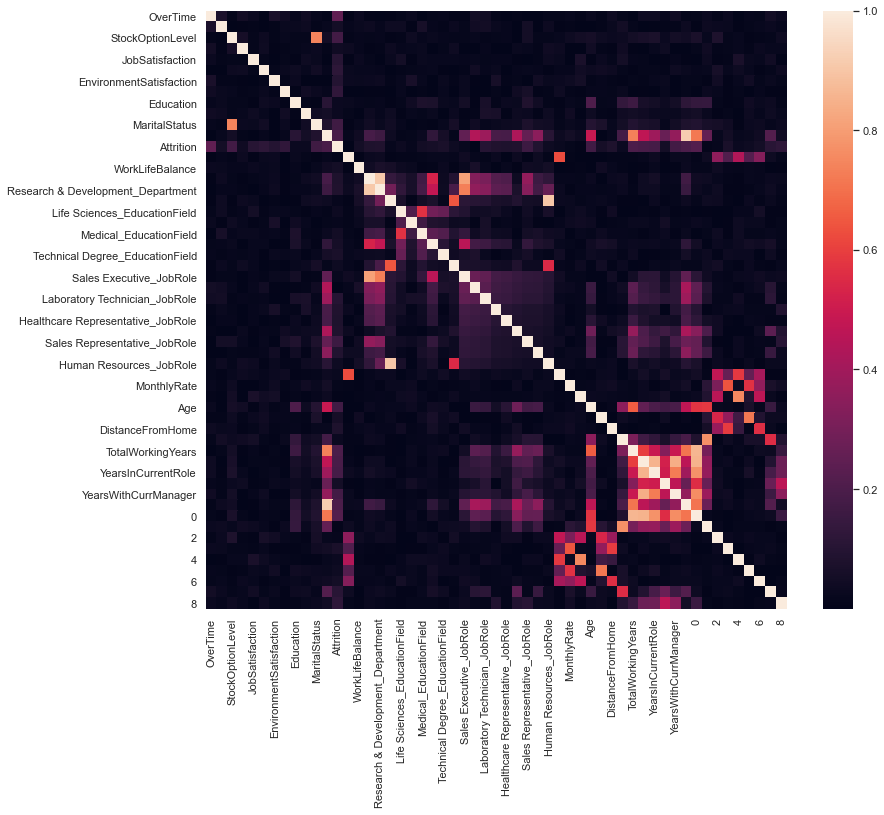

In [192]:
print('Low Correlation: All')
corr = df.corr(method="spearman")
print('\n', abs(corr['WorkLifeBalance']).sort_values())
sns.set(rc={'figure.figsize':(13,11)})
sns.heatmap(abs(corr))

# MonthlyIncome

Numerical variables VS MonthlyIncome


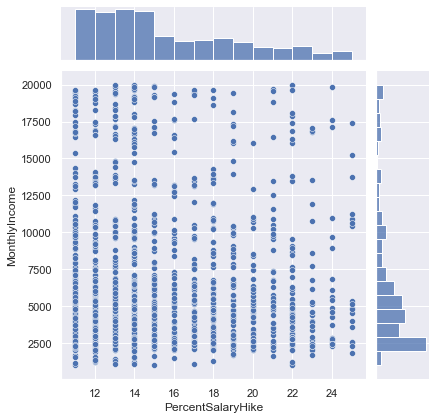

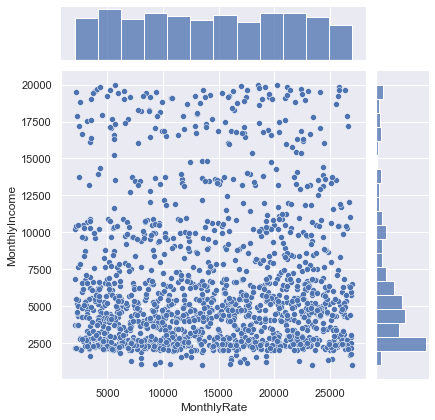

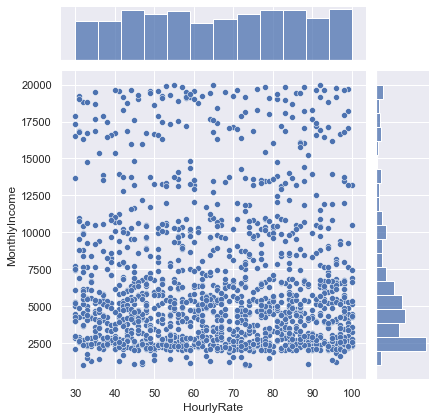

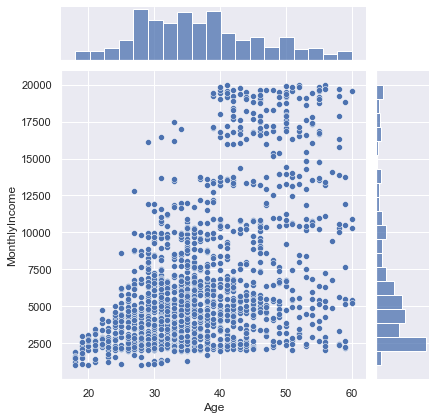

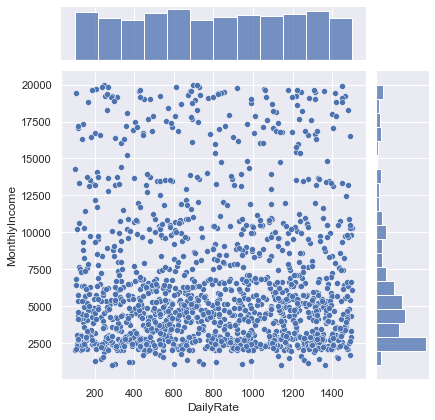

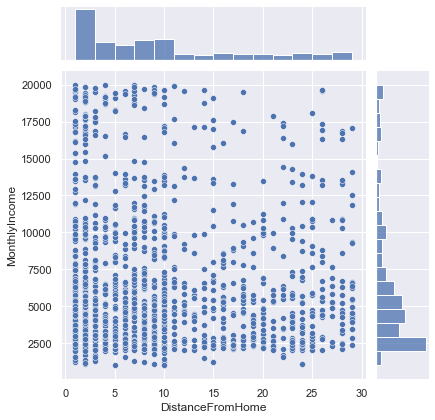

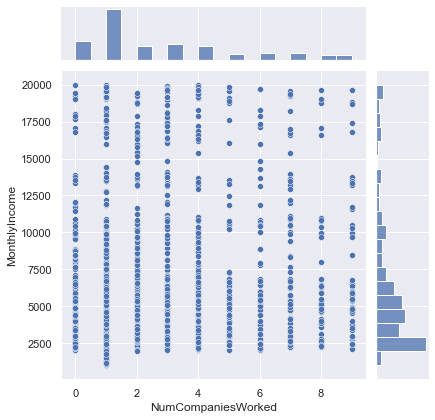

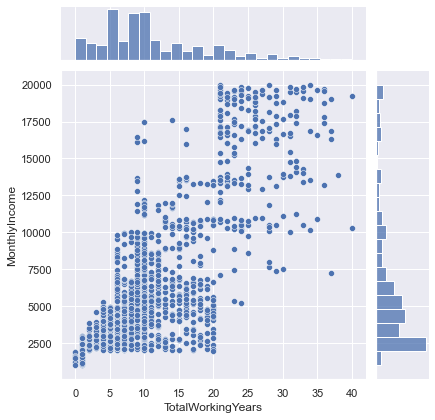

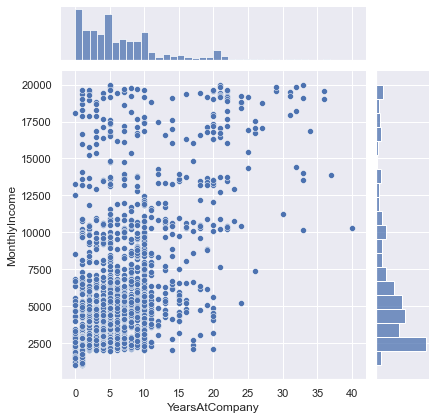

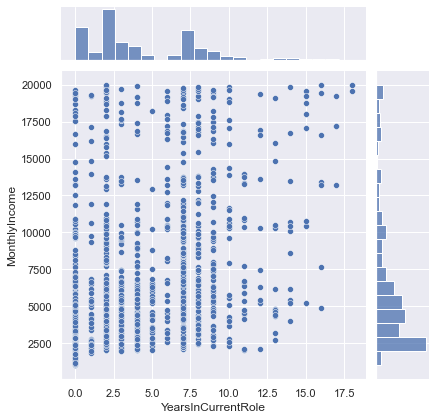

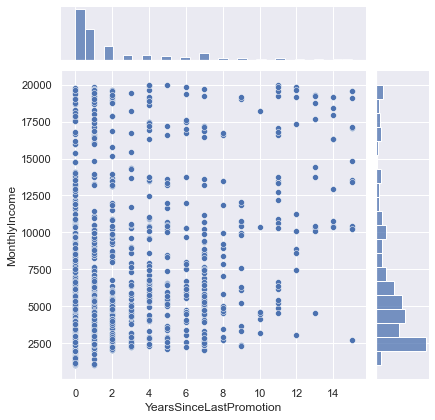

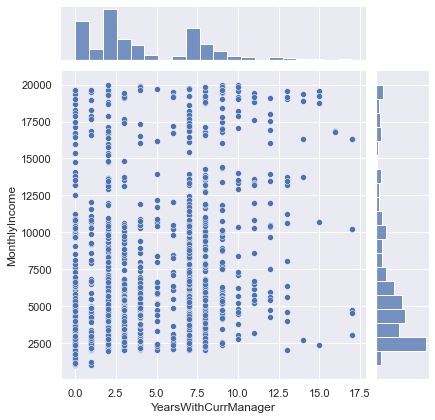

In [193]:
print('Numerical variables VS MonthlyIncome')
for i, name in enumerate(df_numeric.drop(['MonthlyIncome'], axis=1)):
    sns.jointplot(x=name, y='MonthlyIncome', data=df)
    plt.show()

PCA variables VS MonthlyIncome


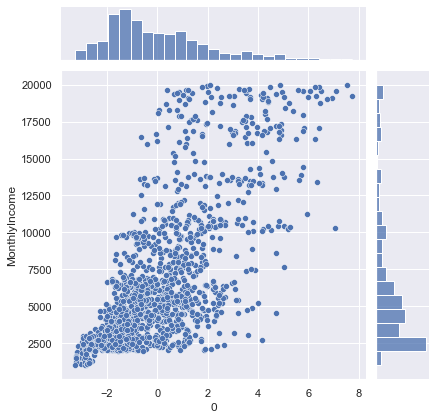

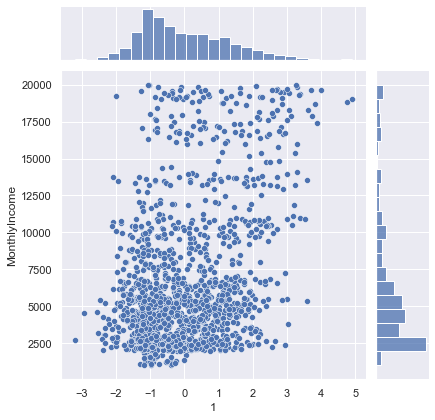

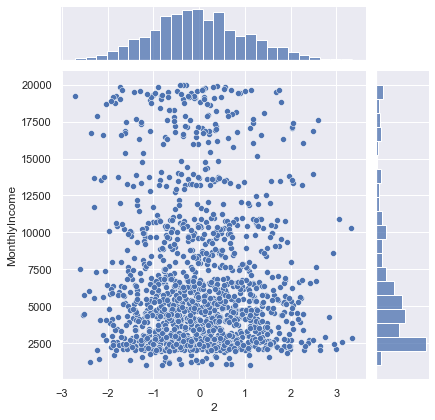

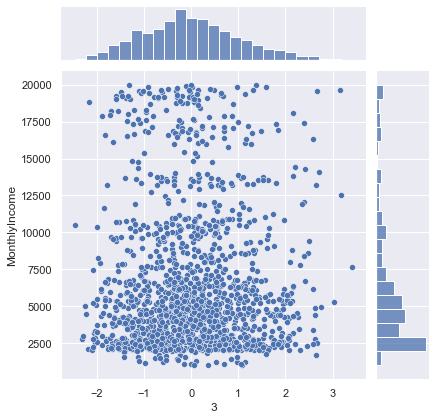

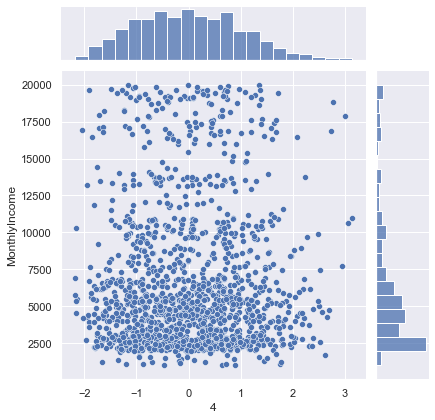

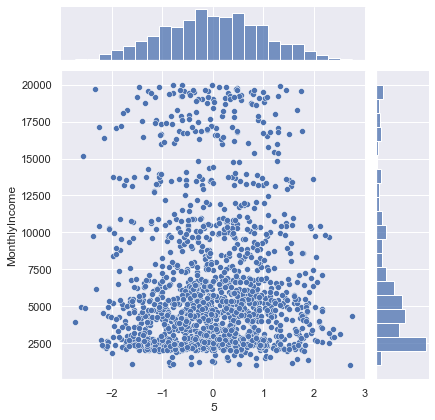

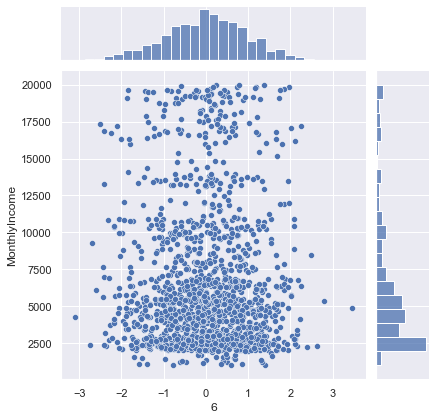

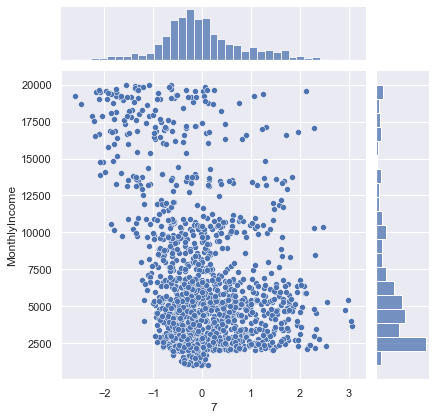

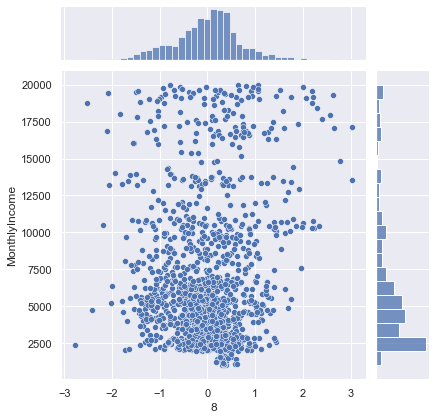

In [194]:
print('PCA variables VS MonthlyIncome')
for i, name in enumerate(df_numeric_pca):
    sns.jointplot(x=name, y='MonthlyIncome', data=df)
    plt.show()

Low Correlation: NumCompaniesWorked, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager
DailyRate                  0.007707
HourlyRate                 0.015794
DistanceFromHome           0.017014
PercentSalaryHike          0.027269
MonthlyRate                0.034814
NumCompaniesWorked         0.149515
YearsWithCurrManager       0.344079
YearsSinceLastPromotion    0.344978
YearsInCurrentRole         0.363818
Age                        0.497855
YearsAtCompany             0.514285
TotalWorkingYears          0.772893
MonthlyIncome              1.000000
Name: MonthlyIncome, dtype: float64


<AxesSubplot:>

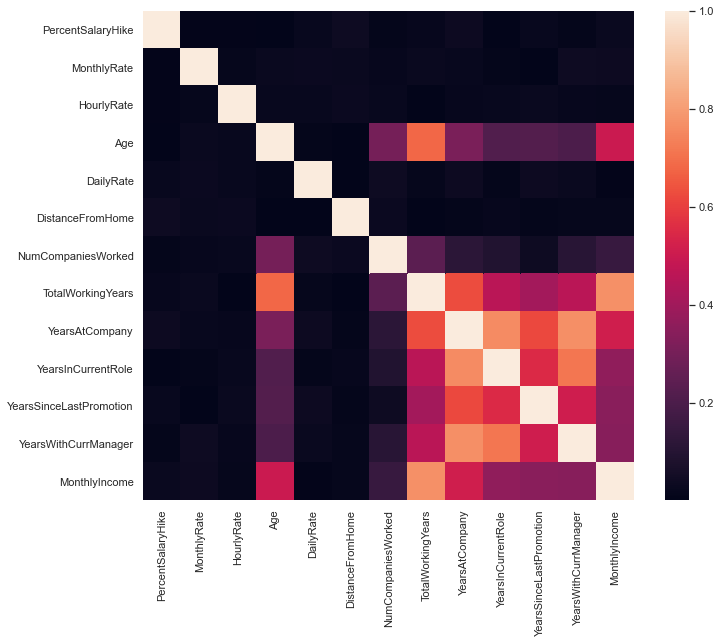

In [195]:
print('Low Correlation: NumCompaniesWorked, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager')
corr = df_numeric.corr()
print(abs(corr['MonthlyIncome']).sort_values())
sns.set(rc={'figure.figsize':(11,9)})
sns.heatmap(abs(corr))

In [196]:
df_t = df_numeric_pca
df_t['MonthlyIncome'] = df_numeric['MonthlyIncome']
corr = df_t.corr()
print(abs(corr['MonthlyIncome']).sort_values())

5                0.000464
3                0.014007
6                0.014175
4                0.021447
2                0.043035
8                0.073662
7                0.323931
1                0.375788
0                0.722658
MonthlyIncome    1.000000
Name: MonthlyIncome, dtype: float64


MonthlyIncome VS Category


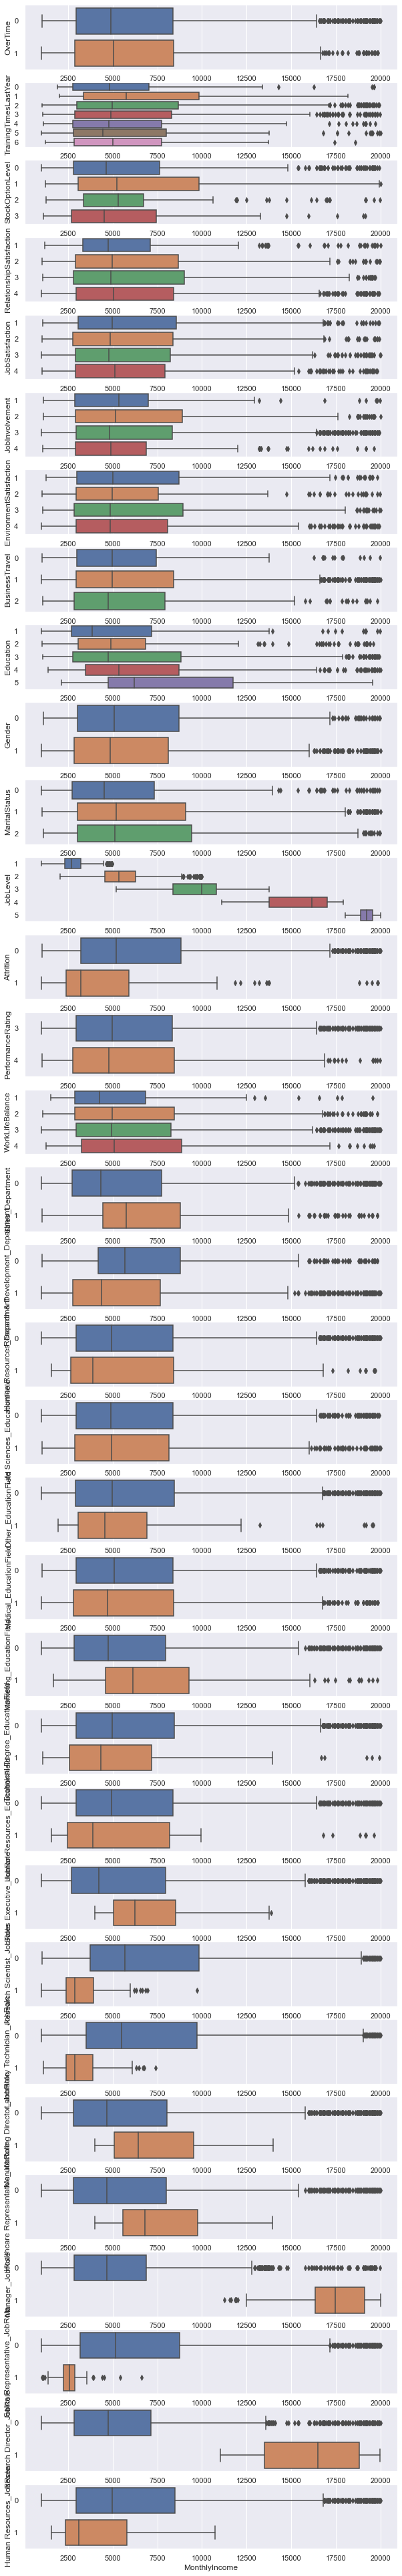

In [197]:
print('MonthlyIncome VS Category')
f, ax = plt.subplots(33, 1, figsize=(10, 70))
for i, name in enumerate(df_category):
    sns.boxplot(x='MonthlyIncome', y=name, data=df, orient='h', ax=ax[i])

Age, Attrition, Department, Education, JobLevel, NumCompaniesWorked, Years

 DistanceFromHome                     0.002512
RelationshipSatisfaction             0.003885
JobSatisfaction                      0.004881
OverTime                             0.008910
Life Sciences_EducationField         0.009182
Human Resources_EducationField       0.012124
BusinessTravel                       0.012614
EnvironmentSatisfaction              0.015163
DailyRate                            0.016260
4                                    0.017215
Other_EducationField                 0.018608
HourlyRate                           0.019762
2                                    0.019774
JobInvolvement                       0.024552
Medical_EducationField               0.025829
6                                    0.026091
PerformanceRating                    0.026999
WorkLifeBalance                      0.030759
Human Resources_Department           0.032108
3                                    0.032196
Per

<AxesSubplot:>

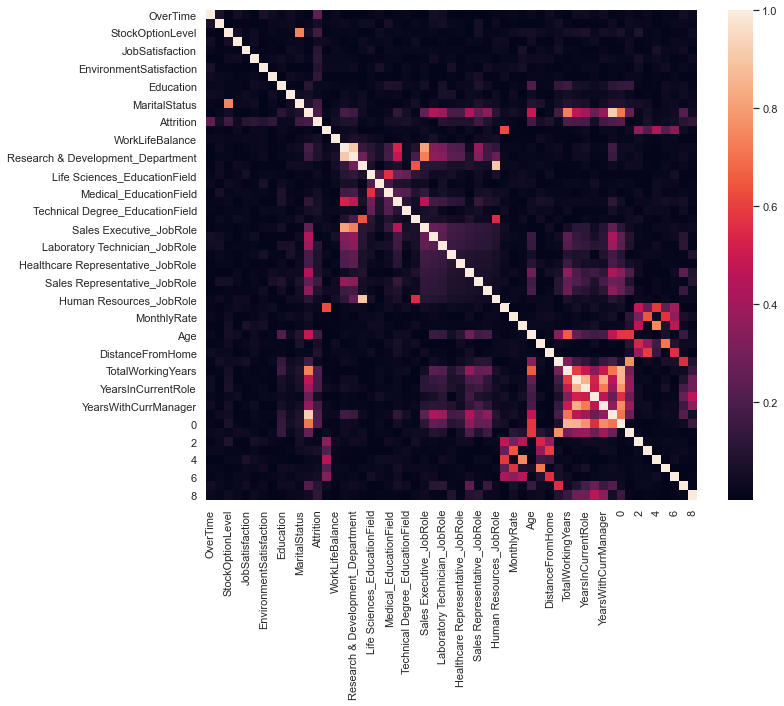

In [198]:
print('Age, Attrition, Department, Education, JobLevel, NumCompaniesWorked, Years')
corr = df.corr(method="spearman")
print('\n', abs(corr['MonthlyIncome']).sort_values())
sns.heatmap(abs(corr))